## Exercise 

Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

1) Build a deep learning model to predict churn rate at bank. 

2) Once model is built, print classification report and analyze precision, recall and f1-score 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('Churn_Modelling.csv')

In [5]:
df.sample(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
721,722,15578761,Cunningham,459,Spain,Female,42,6,129634.25,2,1,1,177683.02,1
164,165,15658929,Taverner,683,Spain,Male,29,0,133702.89,1,1,0,55582.54,1
7161,7162,15775235,Ku,690,France,Female,36,6,110480.48,1,0,0,81292.33,0
675,676,15754605,Jarvis,563,France,Female,39,5,0.00,2,1,1,17603.81,0
636,637,15603323,Bell,660,Spain,Female,33,1,0.00,2,0,0,117834.91,0
9328,9329,15763093,Nucci,540,Germany,Female,35,7,128369.75,2,1,0,198256.15,0


In [6]:
df.drop(['CustomerId','Surname','RowNumber'], axis='columns', inplace=True)
#'CustomerId', 'Surname','RowNumber'

In [7]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8378,614,Germany,Female,37,6,96340.81,2,1,1,139377.24,1
6861,605,Spain,Male,41,5,103154.66,1,0,0,143203.78,0
1405,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
9712,637,France,Male,32,3,0.00,2,1,1,197827.06,0
7688,713,Germany,Male,45,4,131038.14,1,1,0,74005.04,1


In [8]:

df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
#printing unique value: Code
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [10]:
df['Gender'].replace({'Female':1,'Male':0}, inplace = True)

In [11]:
df1= pd.get_dummies(data=df, columns=['Geography'])
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

### Scaling

In [23]:
Col_to_scale = ['CreditScore','Age','Tenure','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[Col_to_scale] = scaler.fit_transform(df1[Col_to_scale])

df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1683,0.722,0,0.459459,0.5,0.00,0.000000,1,1,0.799063,0,1,0,0
8977,0.562,1,0.175676,0.2,88161.85,0.333333,1,0,0.638157,0,0,0,1
1243,0.686,0,0.094595,0.6,146580.69,0.000000,0,1,0.073116,0,0,1,0
4908,0.380,0,0.405405,0.2,109349.29,0.000000,1,0,0.443500,1,1,0,0
355,0.378,0,0.162162,0.0,0.00,0.333333,1,0,0.804917,0,1,0,0


# Train and Test split

In [13]:
X = df1.drop('Exited', axis='columns')
y =df1['Exited']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =5)

print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (8000, 12) (8000,)
Test set:  (2000, 12) (2000,)


# Model Building: ANN using tensorflow and keras

In [14]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(12,), activation='relu'),                     
    keras.layers.Dense(10, activation='tanh'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),                      
])

model.compile(optimizer = 'adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 3s 3ms/step - loss: 0.5006 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4944 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4858 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4795 - accuracy: 0.7968
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4746 - accuracy: 0.7997
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4732 - accuracy: 0.8009
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4715 - accuracy: 0.8020
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4705 - accuracy: 0.8030
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4694 - accuracy: 0.8027
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4686 - accura

250/250 [==============================] - 1s 4ms/step - loss: 0.4395 - accuracy: 0.8124
Epoch 82/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4388 - accuracy: 0.8115
Epoch 83/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4393 - accuracy: 0.8108
Epoch 84/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4394 - accuracy: 0.8121
Epoch 85/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4387 - accuracy: 0.8115
Epoch 86/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4398 - accuracy: 0.8111
Epoch 87/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4388 - accuracy: 0.8119
Epoch 88/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4390 - accuracy: 0.8131
Epoch 89/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4392 - accuracy: 0.8126
Epoch 90/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4385 - accuracy: 

## Testing Model

In [16]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.8110


[0.4393381178379059, 0.8109999895095825]

In [17]:
Y_prediction = model.predict(X_test)

Y_Predicted_final = []    #New list: to Store modified value of 

for value in Y_prediction:
    if value <0.5:
        Y_Predicted_final.append(0)
        
    else:
        Y_Predicted_final.append(1)
Y_Predicted_final[:10]

63/63 [==============================] - 0s 2ms/step


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [18]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

### Model Evaluation

In [20]:
#classification_report

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,Y_Predicted_final))

              precision    recall  f1-score   support

           0       0.82      0.99      0.89      1595
           1       0.70      0.12      0.20       405

    accuracy                           0.81      2000
   macro avg       0.76      0.55      0.55      2000
weighted avg       0.79      0.81      0.75      2000



Text(70.72222222222221, 0.5, 'Truth')

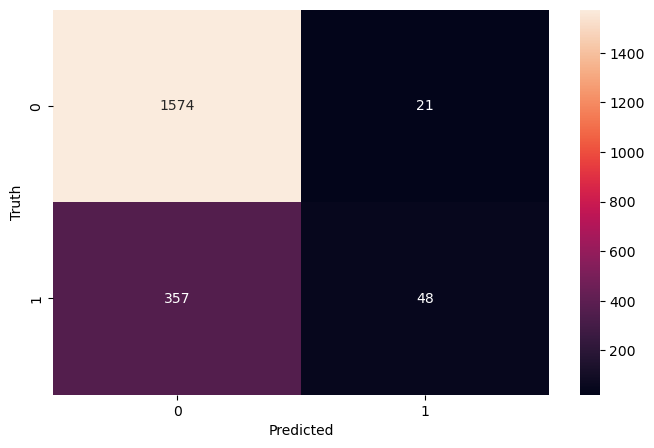

In [22]:
# Confusion Matrix

import seaborn as sns

CM= tf.math.confusion_matrix(labels=y_test,predictions = Y_Predicted_final)



plt.figure(figsize=(8,5))
sns.heatmap(CM, annot=True, fmt='d')


plt.xlabel('Predicted')
plt.ylabel('Truth')

Note: 
- Precision: It helps us to measure the ability to classify positive samples in the model.
-
-Recall: It helps us to measure how many positive samples were correctly classified by the ML model.e the ability to classify positive samples in the model.

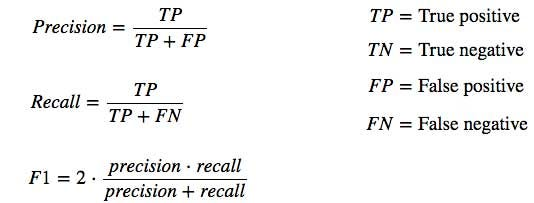

###### Mission Accomplished :)